In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Method to merge all .csv files into one, so we can enter all data
def merge_data():
  data = [files for files in os.listdir(os.path.join('..', '..', 'data','raw')) if files.endswith('.csv')]
  dataFrames = []

  for i in range(len(data)):
    dataFrames.append(pd.read_csv(r"{0}/{1}".format(os.path.join('..', '..', 'data','raw'), data[i]), low_memory=False))

  result = pd.concat(dataFrames, ignore_index=True)
  return load_and_process(result)

# Method Chaining
def load_and_process(result):
  # Method Chain 1 (Load data and deal with missing data)
  df1 = (
    result
      .dropna(subset=['Junction_Control'], how='all')
      .reset_index(drop=True)
  )
  # Method Chain 2 (Create new columns, drop others, and do processing)
  df2 = (
    df1.drop(['Accident_Index', 'Urban_or_Rural_Area', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 
              'LSOA_of_Accident_Location', 'Time', '1st_Road_Class', 
              '1st_Road_Number', 'Speed_limit', 'Special_Conditions_at_Site',
              'Light_Conditions', '2nd_Road_Class', '2nd_Road_Number', 'Junction_Detail', 
              'Local_Authority_(District)', 'Local_Authority_(Highway)'], axis=1)
        .reset_index(drop=True)
        .rename(columns={"Weather_Conditions": "Weather_Type", "Did_Police_Officer_Attend_Scene_of_Accident": "Police_Presense"})
        .replace({'Police_Presense': {'Yes': True, 'No': False}})
        .convert_dtypes()
        .sort_values("Year", ascending=True)
  )
  df2['Date'] = pd.to_datetime(df2['Date'], format='%d/%m/%Y')
  return df2

eda = merge_data()

<AxesSubplot:>

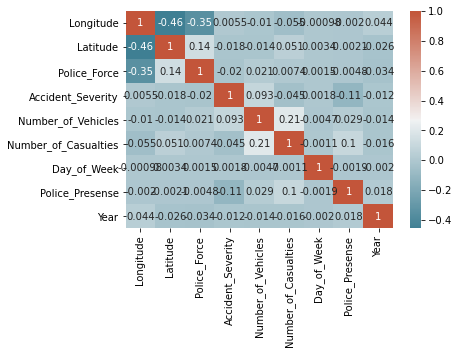

In [4]:
# calculate correlation matrix
corr = eda.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

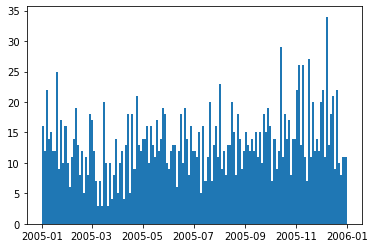

In [5]:
#histogram 
plt.hist(eda[0:2000]["Date"], bins = 150)
plt.show()

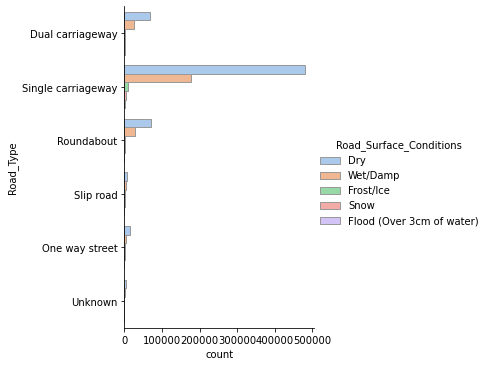

In [6]:
sns.catplot(y="Road_Type", hue="Road_Surface_Conditions", kind="count",
            palette="pastel", edgecolor=".6",
            data=eda)

In [ ]:
catplot = sns.catplot(data = eda, y='Number_of_Casualties', x='Road_Type', height=7.5, aspect=11.7/7.5)

plt.ylabel("Number of Casualties")
plt.xlabel("Type of Road")
catplot

<img src="TurnerImages/RoadvsCasualties.png" width="600" height="400">